<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IAPR:-Lab-3-‒--Classification" data-toc-modified-id="IAPR:-Lab-3-‒--Classification-1"><a href="https://github.com/LTS5/iapr" target="_blank">IAPR</a>: Lab 3 ‒  Classification</a></span><ul class="toc-item"><li><span><a href="#Important-notes" data-toc-modified-id="Important-notes-1.1">Important notes</a></span></li><li><span><a href="#Extract-relevant-data" data-toc-modified-id="Extract-relevant-data-1.2">Extract relevant data</a></span></li><li><span><a href="#Part-1" data-toc-modified-id="Part-1-1.3">Part 1</a></span><ul class="toc-item"><li><span><a href="#1.1-Bayes-method-(5-pts)" data-toc-modified-id="1.1-Bayes-method-(5-pts)-1.3.1">1.1 Bayes method (5 pts)</a></span></li><li><span><a href="#1.1.1-Background" data-toc-modified-id="1.1.1-Background-1.3.2">1.1.1 Background</a></span></li><li><span><a href="#1.1.2-Plot-separation-curve" data-toc-modified-id="1.1.2-Plot-separation-curve-1.3.3">1.1.2 Plot separation curve</a></span></li><li><span><a href="#1.2-Mahalanobis-distance-(5-pts)" data-toc-modified-id="1.2-Mahalanobis-distance-(5-pts)-1.3.4">1.2 Mahalanobis distance (5 pts)</a></span></li></ul></li><li><span><a href="#Part-2" data-toc-modified-id="Part-2-1.4">Part 2</a></span><ul class="toc-item"><li><span><a href="#2.1-Dataset-loading" data-toc-modified-id="2.1-Dataset-loading-1.4.1">2.1 Dataset loading</a></span></li><li><span><a href="#2.2-MLP-(10-pts)" data-toc-modified-id="2.2-MLP-(10-pts)-1.4.2">2.2 MLP (10 pts)</a></span><ul class="toc-item"><li><span><a href="#2.2.1-Introduction-to-MLP" data-toc-modified-id="2.2.1-Introduction-to-MLP-1.4.2.1">2.2.1 Introduction to MLP</a></span></li><li><span><a href="#2.2.2---Scikit-learn-method-to-construct-the-MLP-classifier." data-toc-modified-id="2.2.2---Scikit-learn-method-to-construct-the-MLP-classifier.-1.4.2.2">2.2.2   <a href="http://scikit-learn.org/stable/index.html" target="_blank">Scikit-learn</a> method to construct the MLP classifier.</a></span></li><li><span><a href="#2.2.3-Use-Pytorch-method-to-construct-MLP-model" data-toc-modified-id="2.2.3-Use-Pytorch-method-to-construct-MLP-model-1.4.2.3">2.2.3 Use <a href="https://pytorch.org/" target="_blank">Pytorch</a> method to construct MLP model</a></span></li><li><span><a href="#2.2.4-Conclusion" data-toc-modified-id="2.2.4-Conclusion-1.4.2.4">2.2.4 Conclusion</a></span></li></ul></li></ul></li></ul></li></ul></div>

# [IAPR][iapr]: Lab 3 ‒  Classification


**Group ID:** 32

**Author 1 (350508):** Ziyi ZHAO  
**Author 2 (321657):** Yujie HE   
**Author 3 (337088):** Xufeng GAO    

**Release date:** 07.04.2022
**Due date:** 25.04.2022


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.


[iapr]: https://github.com/LTS5/iapr

## Extract relevant data
We first need to extract the `lab-03-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [7]:
import cv2 # merge cv2 and cv
import cv2 as cv
import numpy as np
import tarfile
import os
import copy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

---
## Part 1
In this part, we will study classification based on the data available in the Matlab file `classification.mat` that you will under `lab-03-data/part1`.
There are 3 data sets in this file, each one being a training set for a given class.
They are contained in variables `a`, `b` and `c`.

**Note**: we can load Matlab files using the [scipy.io] module.

[scipy.io]: https://docs.scipy.org/doc/scipy/reference/io.html

In [7]:
import scipy.io

data_part1_path = os.path.join(data_base_path, data_folder, 'part1', 'classification.mat')
matfile = scipy.io.loadmat(data_part1_path)
a = matfile['a']
b = matfile['b']
c = matfile['c']

print(a.shape, b.shape, c.shape)

(200, 2) (200, 2) (200, 2)


First we check the feature space distribution of each class

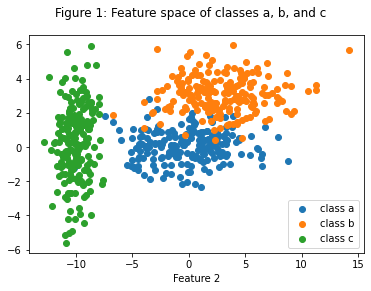

In [4]:
plt.scatter(a[:,0], a[:,1], label='class a')
plt.scatter(b[:,0], b[:,1], label='class b')
plt.scatter(c[:,0], c[:,1], label='class c')
plt.xlabel('Feature 1')
plt.xlabel('Feature 2')
plt.suptitle('Figure 1: Feature space of classes a, b, and c')
plt.legend(loc='lower right')
plt.show()

### 1.1 Bayes method (5 pts)
Using the Bayes method, give the expression of the **separation curves** between those three classes.
Do reasonable hypotheses about the distributions of those classes and estimate the corresponding parameters based on the given training sets.
Draw those curves on a plot, together with the training data. Note that you do not need to solve the analytical expression. You can simply evaluate the function for each point on the plane to end up with a segmentation map.
For simplicity reasons, round the estimated parameters to the closest integer value.

### 1.1.1 Background
Bayes method provides a principled way for calculating the conditional probability of a class label given a data sample. By definition, Bayes method states the following relationship, given a class variable $w_i$ and a dependent feature vactor $x$:
$$
P(w_i|x) = \frac{P(x|w_i)P(w_i)}{P(x)}
\tag{1}
$$
If we are trying to decide between two class labels, such as $w_a$ and $w_b$ corresponding to class a and b in our case, then one way to make this decision is to compute the ratio of the posterior probabilities for each data sample:
$$
\frac{P(w_a|x)}{P(w_b|x)}=\frac{P(x|w_a)P(w_a)}{P(x|w_b)P(w_b)}=\frac{P(x|w_a)}{P(x|w_b)}
\tag{2}
$$

Because the training sets of each class have the same amount of data in our case, the prior probability of each calss $P(w_i)$ is always 1/3. All we need now is some model by which we can compute $P(x|w_i)$ for each label. Such a model is called a generative model because it specifies the hypothetical random process that generates the data, which in practice requires an enormous number of samples (very large-sized dataset) and is computationally expensive. 

In order to make it simpler, the following naive assumptions are made:
- we assume the effect of a particular feature in a class is independent of other features.
- we assume the data from each class is drawn from a Gaussian distribution

In order to support our assumptions, the data distribution plots for each class are provided. As shown in above figure, all 3 classes give a Gaussian-like distribution, which validates our assumptions.




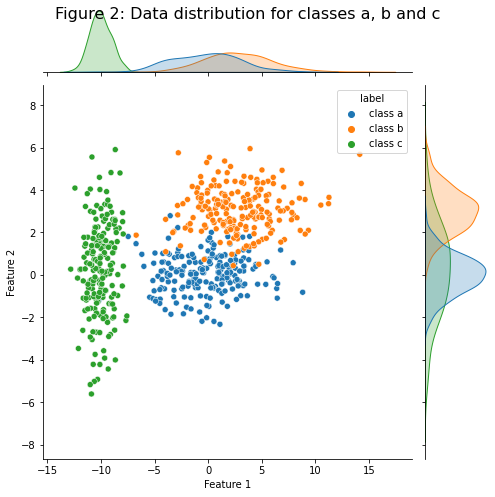

In [5]:
df_a = pd.DataFrame(a, columns=['Feature 1', 'Feature 2'])
df_b = pd.DataFrame(b, columns=['Feature 1', 'Feature 2'])
df_c = pd.DataFrame(c, columns=['Feature 1', 'Feature 2'])
df_a['label'] = 'class a'
df_b['label'] = 'class b'
df_c['label'] = 'class c'
all_data = pd.concat([df_a, df_b, df_c], ignore_index=True)
sns.jointplot(data=all_data, x='Feature 1', y='Feature 2', hue='label', height=7)
plt.suptitle('Figure 2: Data distribution for classes a, b and c', size=16)
plt.show()

The **separation curve** is defined as the set of potints where the probability to classify a sample in two different classes $i,j$ is the same, which gives: 

$$
P(w_i|x) = P(w_j|x)⟺P(w_i|x) - P(w_j|x) = 0 
\tag{3}
$$

From Equation 1 we then have:

$$
P(x|w_i)P(w_i) = P(x|w_j)P(w_j)
\tag{4}
$$

As our classes follow the Gaussian distribution, the probability items in Equations 3 and 4 can be described by a discriminat function as follows:

\begin{equation} 
\begin{split}
g_i(x) & = ln(P(w_i|x)) = ln(P(x|w_i)P(w_i)) = ln(P(x|w_i)) + ln(P(w_i)) \\
& = -\frac{1}{2}(x-μ_i)^T \Sigma_{i}^{-1} (x-μ_i) + lnP(w_i) + c_i 
\end{split}
\tag{5}
\end{equation}

where,
- $μ_i$ is the mean of class $w_i$.
- $\Sigma_i$ is the covariance matrix between features. For 2-feature class, with our first assumption, $\Sigma_i = \begin{bmatrix} σ_1^2 & 0 \\ 0 & σ_2^2\end{bmatrix}$, $σ_1^2$ and $σ_2^2$ are variance for features. 
- $c_i$ is a constant, which is $\ln{\frac{1}{\sqrt{{(2\pi)}^k|\Sigma_{i}|}}}$, $k=rank(\Sigma_{i})$.

Thus, for a 2D class, teh Equation 5 can be further expanded as:
$$
g_i(x) = -\frac{1}2(\frac{x_1^2}{\sigma_1^2}+\frac{x_2^2}{\sigma_2^2})+(\frac{x_1\mu_1}{\sigma_1^2}+\frac{x_2\mu_2}{\sigma_2^2})-\frac{1}2(\frac{\mu_1^2}{\sigma_1^2}+\frac{\mu_2^2}{\sigma_2^2}) + \ln{P(w_i)} + \ln{\frac{1}{2πσ_1σ_2}}
\tag{6}
$$

Thus, the **separation curve** can be expressed as:
$$
g_{i,j}(x) = g_i(x) - g_j(x) = 0
\tag{7}
$$

It is obvious that:
- the separation curve is hyper quadrics if two classes have different covariance matrices. 
- If all classes have the same covariance matrix, the quadratic terms will vanish and a simple linear classifier can be used to separate these classes.
- The prior probability $\ln{P(w_i)}$ will be canceled out.


From Fig.2, we can see that the shapes of the two distributions for classes a and b are quite similar, which means these two classes have similar covariance matrices. Therefore, we can infer that the separation curve between class a and class b is close to a line. For class c, a quadratic separation curve may be required because its distribution shape is quite different from the other classes.

In [6]:
cov_a = df_a.cov()
cov_a

,Feature 1,Feature 2
Feature 1,10.027697,0.131623
Feature 2,0.131623,0.839327


In [7]:
cov_b = df_b.cov()
cov_b

,Feature 1,Feature 2
Feature 1,10.170348,0.180238
Feature 2,0.180238,1.084004


In [8]:
cov_c = df_c.cov()
cov_c

,Feature 1,Feature 2
Feature 1,0.970130,0.234581
Feature 2,0.234581,4.697563


The results show that the elements in the right diagonal are much smaller than others, which means that the two features are independent of each other. Moreover, the covariance matric of class a is quite similar to the one obtained from class b, which confirms our obsrvations on the shapes of distribution.

### 1.1.2 Plot separation curve

We plot the separation curves based on the Equations 6 and 7.

In [9]:
def discriminant(x_1, x_2, data_set):
    cov = data_set.cov().to_numpy()
    mean = data_set.mean().to_numpy()
    var_1 = cov[0,0]
    var_2 = cov[1,1]
    mean_1 = mean[0]
    mean_2 = mean[1]
    constant = -0.5 * (mean_1**2/var_1 + mean_2**2/var_2) + np.log(1/(2*np.pi*np.sqrt(var_1*var_2)))
    g = -0.5 * (x_1**2/var_1 + x_2**2/var_2) + x_1*mean_1/var_1 + x_2*mean_2/var_2 + constant
    return g

In [10]:
# find the max_min limits in feature space
max_F1 = all_data['Feature 1'].max()
min_F1 = all_data['Feature 1'].min()
max_F2 = all_data['Feature 2'].max()
min_F2 = all_data['Feature 2'].min()

# produce a meshgrid that covers the entire feature space
range_F1 = np.arange(min_F1, max_F1, 0.1)
range_F2 = np.arange(min_F2, max_F2, 0.1)
grid_F1, grid_F2 = np.meshgrid(range_F1, range_F2)

# calculate discrinant for each class
g_a = discriminant(grid_F1, grid_F2, df_a)
g_b = discriminant(grid_F1, grid_F2, df_b)
g_c = discriminant(grid_F1, grid_F2, df_c)

# calculate separation curve
g_ab = g_a - g_b
g_ac = g_a - g_c
g_bc = g_b - g_c

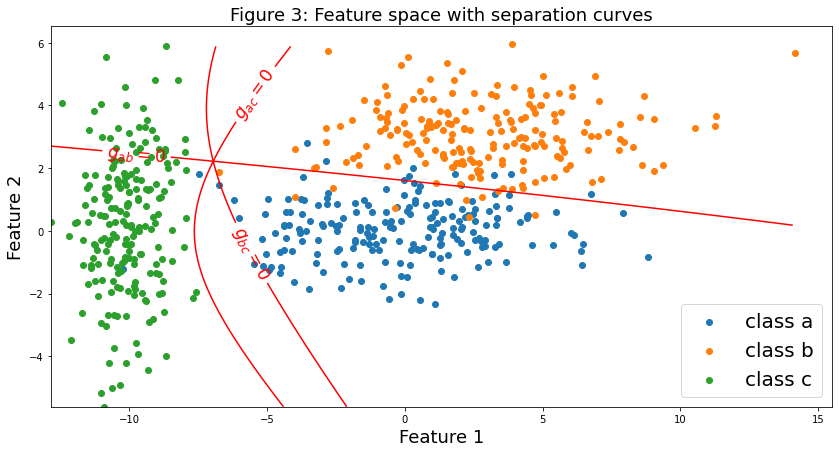

In [11]:
# draw data sets
fig, ax = plt.subplots(figsize=(14,7))
ax.scatter(a[:,0], a[:,1], label='class a')
ax.scatter(b[:,0], b[:,1], label='class b')
ax.scatter(c[:,0], c[:,1], label='class c')
ax.set_xlabel('Feature 1', fontsize=18)
ax.set_ylabel('Feature 2', fontsize=18)
ax.set_title('Figure 3: Feature space with separation curves', fontsize=18)
ax.legend(loc='lower right', fontsize=20)

# draw separation curves
sepCurve_ab = ax.contour(grid_F1, grid_F2, g_ab, 0, colors='red')
sepCurve_ac = ax.contour(grid_F1, grid_F2, g_ac, 0, colors='red')
sepCurve_bc = ax.contour(grid_F1, grid_F2, g_bc, 0, colors='red')

# show labels
ax.clabel(sepCurve_ab, inline=True, fmt='$g_{ab}=0$', fontsize=17)
ax.clabel(sepCurve_ac, inline=True, fmt='$g_{ac}=0$', fontsize=17)
ax.clabel(sepCurve_bc, inline=True, fmt='$g_{bc}=0$', fontsize=17)
plt.show()

As shown in Figure 3, the three data classes are well classified using our separate curves, although some samples are still misidentified.

### 1.2 Mahalanobis distance (5 pts)
For classes `a` and `b`, give the expression of the Mahalanobis distance used to classify a point in class `a` or `b`, and verify the obtained classification, in comparison with the "complete" Bayes classification, for a few points of the plane.

In [1]:
class MahaDistClassifier():
    def __init__(self, xtrain, ytrain):
        self.a = xtrain[ytrain == 0, :]
        self.b = xtrain[ytrain == 1, :]
        a_mean, b_mean = np.mean(self.a, axis=0), np.mean(self.b, axis=0)
        a_cov, b_cov = np.cov(self.a.T), np.cov(self.b.T)
        self.a_maha = self.compute_maha_dist(a_mean, a_cov)
        self.b_maha = self.compute_maha_dist(b_mean, b_cov)

    def predict_class(self, xtest):
        return np.argmin(np.vstack((self.a_maha(xtest), self.b_maha(xtest))), axis=0) 
    
    def compute_maha_dist(self, mean, cov):
        sigma = np.linalg.inv(cov)
        def maha_dist(X):
            center_x = X -  np.tile(mean, (X.shape[0], 1))
            return np.sqrt(np.diag((center_x @ sigma) @ center_x.T))
        return maha_dist    

The Mahalanobis distance can be computed as $d_m = \sqrt{(x-\mu_i) \Sigma^{-1} (x-\mu_i)^T}$, so that the predicted class is the one that minimizes the Mahalanobis distance.


In [8]:
X = np.vstack((a,b))
y = np.ravel(np.vstack((np.zeros(200),np.ones(200))))

clf = MahaDistClassifier(X, y)

a_pred, b_pred = clf.predict_class(a), clf.predict_class(b)
a_cor, a_err = np.sum(a_pred == 0), np.sum(a_pred != 0)
b_cor,b_err = np.sum(b_pred == 1), np.sum(b_pred != 1)

print("Error on a: {}/{}\nError on b: {}/{}\nTotal error: {}/{}".format(
    a_err, len(a_pred), b_err, len(b_pred), a_err+b_err, len(a_pred)+len(b_pred))
     )

Error on a: 10/200
Error on b: 9/200
Total error: 19/400


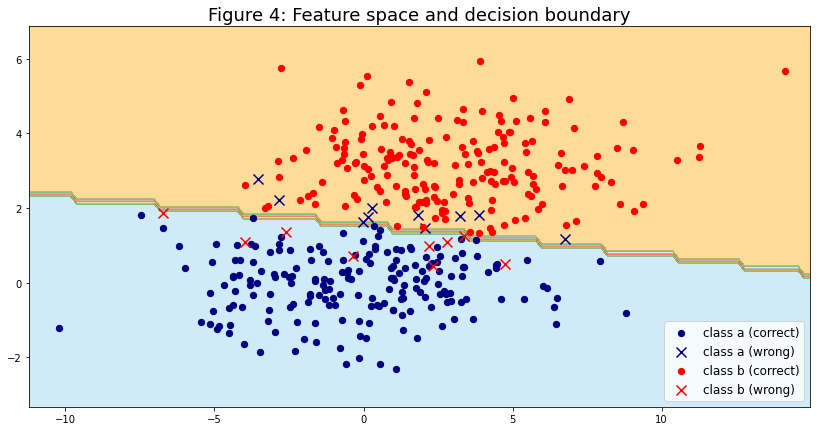

In [9]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))
xtest = np.c_[xx.ravel(), yy.ravel()]
zz = clf.predict_class(xtest).reshape(xx.shape)

fig2, ax2 = plt.subplots(figsize=(14,7))

# draw decision boundary
ax2.contourf(xx, yy, zz, alpha=0.4, colors = ['skyblue', 'green', 'orange', 'red'])

# draw datapoints
ax2.scatter(a[a_pred == 0,0], a[a_pred == 0,1], s=40, c='navy', label='class a (correct)')
ax2.scatter(a[a_pred != 0,0], a[a_pred != 0,1], s=100, c='navy', marker='x', label='class a (wrong)')
ax2.scatter(b[b_pred == 1,0], b[b_pred == 1,1], s=40, c='red', label='class b (correct)')
ax2.scatter(b[b_pred != 1,0], b[b_pred != 1,1], s=100, c='red', marker='x', label='class b (wrong)')

ax2.set_title('Figure 4: Feature space and decision boundary', fontsize=18)
ax2.legend(loc='lower right', fontsize=12)

plt.show()

The Mahalanobis distance classification could work relatively well with only 9/200 points from class a and 10/200 points from class b near the boundary are misclassified as shown in Fig.4.

---

## Part 2
In this part, we aim to classify digits using the complete version of MNIST digits dataset.
The dataset consists of 60'000 training images and 10'000 test images of handwritten digits.
Each image has size 28x28, and has assigned a label from zero to nine, denoting the digits value.
Given this data, your task is to construct a Multilayer Perceptron (MLP) for supervised training and classification and evaluate it on the test images.

Download the MNIST dataset (all 4 files) from http://yann.lecun.com/exdb/mnist/ under `lab-03-data/part2`.
You can then use the script provided below to extract and load training and testing images in Python. 

**! Warning**: When the lab was created the official MNIST repo was down, if it is still the case please use https://github.com/mkolod/MNIST.

### 2.1 Dataset loading
Here we first declare the methods `extract_data` and `extract_labels` so that we can reuse them later in the code.
Then we extract both the data and corresponding labels, and plot randomly some images and corresponding labels of the training set.

In [10]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

def extract_data(filename, image_shape, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(np.prod(image_shape) * image_number)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(image_number, image_shape[0], image_shape[1])
    return data


def extract_labels(filename, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * image_number)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [11]:
image_shape = (28, 28)
train_set_size = 60000
test_set_size = 10000

data_part2_folder = os.path.join(data_base_path, data_folder, 'part2')

train_images_path = os.path.join(data_part2_folder, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_part2_folder, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_part2_folder, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_part2_folder, 't10k-labels-idx1-ubyte.gz')

train_images = extract_data(train_images_path, image_shape, train_set_size)
test_images = extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels = extract_labels(test_labels_path, test_set_size)

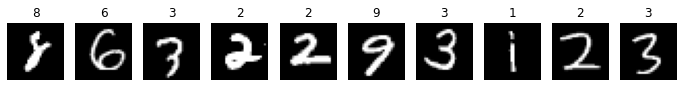

In [12]:
prng = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=train_set_size, size=10)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for ax, im, lb in zip(axes, train_images[plt_ind], train_labels[plt_ind]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(lb)

### 2.2 MLP (10 pts)

To create an MLP you are free to choose any library.
In case you don't have any preferences, we encourage you to use the [scikit-learn] package; it is a simple, efficient and free tool for data analysis and machine learning.
In this [link][sklearn-example], you can find a basic example to see how to create and train an MLP using [scikit-learn].
Your network should have the following properties:
* Input `x`: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
* 100 hidden units `h`.
* 10 output units `y`, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit `i`.

If you need additional examples you can borrow some code from image classification tutorials.
However, we recommend that you construct a minimal version of the network on your own to gain better insights.

[scikit-learn]: http://scikit-learn.org/stable/index.html
[sklearn-example]: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

#### 2.2.1 Introduction to MLP

A multilayer perceptron (MLP) is a fully connected class of feedforward artificial neural network (ANN), which is a typical model of non-linear classifiers as well as a supervised learning algorithm. Even as one of the simplest and original neural networks, MLP has shown great results in the field of classification problems.

**Advantages and disadvantages**

The advantages of Multi-layer Perceptron are:

  * Capability to learn non-linear models.

  * Capability to learn models in real-time (on-line learning) using partial_fit.

The disadvantages of Multi-layer Perceptron (MLP) include:

   * MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.

   * MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.

   * MLP is sensitive to feature scaling.
   
**MLP Theory**   
1. Structure
   
   An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training.Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.
   
   According to the requirements of this task, the input layer has **28*28** units, the hidden layer **100** units and the output layer **10** units.
   
2. Activation Function
   
   In general, the    [activation function](https://en.wikipedia.org/wiki/Activation_function "Activation function")for multi-layer perceptrons are divided into linear and non-linear activation functions.
   If a linear activation function (constant excitation function) is used, then the neural network simply combines the inputs linearly before outputting them, in which case there is no difference between a deep (multiple hidden layer) neural network and a neural network with only one hidden layer.
   Meanwhile, Non-linear activation functions, on the other hand, were developed to model the frequency of [action potentials](https://en.wikipedia.org/wiki/Action_potentials "Action potentials") or firings of biological neurons and are often more practical as well. Therefore, to make sense of the multiple hidden layers of a neural network, a non-linear activation function is required, i.e. the only way to make a neural network learn features with deeper and higher dimensionality is to use a non-linear activation function.
   Commonly used non-linear activation functions include Sigmoid, Relu, Softmax, etc.
   
   * Sigmoid
   
     A **sigmoid** function is a mathematical function having a characteristic **"S"-shaped curve or sigmoid curve**.  A common example of a sigmoid function is the logistic function.
     $$
     Logistic\, function:\,{f}_{x}=\frac {1} {1+{e}^{-x}}
     $$
     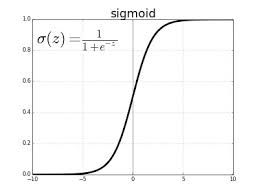
    Advantages: 1. the output of the Sigmoid function is between (0,1), the output range is limited, the optimization is stable, it can be used as an output layer. 2. continuous function, easy to find the derivative.

    Disadvantages: 1. the most obvious is saturation, from the above figure is also not difficult to see its two sides of the derivative gradually converge to 0, easy to cause the gradient to disappear. 2. activation function of the phenomenon of offset, Sigmoid function output values are greater than 0, so that the output is not 0 mean, which will lead to the latter layer of neurons will get the previous layer of non-0 mean signal as input, which will have an impact on the gradient. 3. 3. The computational complexity is high because the Sigmoid function is exponential in form.
    
   * RelU
   
     **ReLU(rectified linear unit)**, also known as modified linear unit, is an activation function commonly used in artificial neural networks and is often used to refer to non-linear functions represented by the ramp function and its variants.
     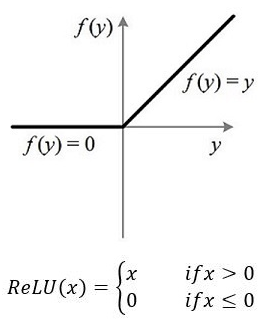
     Relu is an excellent activation hash, compared to the traditional Sigmoid function, that does three things.
    1. prevention of gradient dispersion
    2. sparsity of activation
    3. speed up computation
    
    In contrast to Sigmoid, which has better activation only when the derivative is around 0, the gradient in both the positive and negative saturation regions is close to 0, so this can cause gradient dispersion, whereas the relu function has a constant gradient in the part of the gradient greater than 0, so no gradient dispersion occurs. In addition, the relu function has a derivative of 0 in the negative half, so once the neuron activation value enters the negative half, then the gradient will be 0, meaning that the neuron will not undergo training, which is known as sparsity. At the same time, the derivative of the relu function is much faster to compute and the program is implemented as an if-else statement, whereas the sigmoid function has to perform floating point quadratic operations. In summary, relu is a very good activation function. 

   * Softmax
   
     The **softmax function,** also known as **softargmax**  or **normalized exponential function**  is a generalization of the [logistic function](https://en.wikipedia.org/wiki/Logistic_function "Logistic function") to multiple dimensions. It is used in [multinomial logistic regression](https://en.wikipedia.org/wiki/Multinomial_logistic_regression "Multinomial logistic regression") and is often used as the last activation function of a neural network to normalize the output of a network to a probability distribution over predicted output classes.
     
     The **Softmax function** is a generalisation of the binary classification function Sigmoid to **multiclassification**, with the aim of presenting the results of multiclassification as probabilities.
     
     $$
      {Softmax(x)}_{i}=\frac {{e}^{{x}_{i}}} {\sum ^{K}_{j=1} {{e}^{{x}_{j}}}}\,   for\, i\, =1,2,3,...k 
     $$

    ![image2.ong](https://img-blog.csdnimg.cn/2019111910482712.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2x6X3BldGVy,size_16,color_FFFFFF,t_70)

     **Conclusion**   
    We use **Relu** activation for the hidden layer and **Softmax** for the output layer(which will be relfected in the **CrossEnotropy Loss**）.


3. Weight Updating
    
    Weight update means the learning process of the network for the data features. 
    
    Learning occurs in the perceptron by changing connection weights after each piece of data is processed, based on the amount of error in the output compared to the expected result. In trems of supervised learning,the learning process is usually carried out through backpropagation, a generalization of the least mean squares algorithm in the linear perceptron. To be more precise, **back propagation** is an effective method for computing gradients in a directed computational graph such as a neural network. It is **not a learning method, but a good computational technique** that is often used in learning methods.
    
    In this task, we choose **Stochastic gradient descent** (often abbreviated **SGD**) as the optimizer for gradient computing. SGD is one of many optimisation methods, i.e. a first-order optimiser, which means that it is based on the analysis of the target gradient. As such, in the case of neural networks, it is often applied in conjunction with back propagation algorithms for efficient updating.
    
    In pseudocode, stochastic gradient descent can be presented as :
    
    1) Choose an initial vector of parameters {\displaystyle w}w and learning rate {\displaystyle \eta }\eta .
    
    2) Repeat until an approximate minimum is obtained:
    
    3) Randomly shuffle samples in the training set.
    
    4) For {\displaystyle i=1,2,...,n}{\displaystyle i=1,2,...,n}, do:     $ w：=w-\eta ▽{}_{}{Q}_{i}(w) $, where w is the weight between one unit and the other, Q is the object function to minimize(usually loss function), $\eta$ is a step size (sometimes called the learning rate in machine learning). 
    
    **Conclusion**
    
    Loss: Cross Entropy loss
    
    Optimizer: Stochastic gradient descent


#### 2.2.2   [Scikit-learn] method to construct the MLP classifier.


[scikit-learn]: http://scikit-learn.org/stable/index.html


In [13]:
# Reshape
# (28*28) --> (784,)
def input_reshape(train_images, test_images):
    train_im= []
    test_im = []
    for im_train in train_images:
        train_im.append(im_train.flatten())
    for im_test in test_images:
        test_im.append(im_test.flatten())
    return train_im, test_im
train_im, test_im = input_reshape(train_images, test_images)

In [14]:
# Based on experience of running the code, the training process generally takes 2-3 minutes
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5, 
                    hidden_layer_sizes=(100), random_state=1)
clf.fit(train_im, train_labels)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=100, random_state=1)

**Some feature of MLP class in Scikit-learn.**

1. Cross-Entropy loss function： Currently, MLPClassifier supports only the Cross-Entropy loss function, which allows probability estimates by running the predict_proba method.

2. MLP trains using Backpropagation. More precisely, it trains using some form of gradient descent and the gradients are calculated using Backpropagation. For classification, it minimizes the Cross-Entropy loss function, giving a vector of probability estimates P(y|x) per sample x.(reference: https://scikit-learn.org/stable/modules/neural_networks_supervised.html)
    
3. solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
    The solver for weight optimization.
    
    ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.

    ‘sgd’ refers to stochastic gradient descent.

    ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

    Note: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.

In [15]:
predicted_labels=clf.predict(test_im)

In [16]:
test_correct = np.sum(test_labels==predicted_labels)
print('Number of test_images: %d'%(test_labels.shape[0]))
print('Number of predicting correctly: %d'%(np.sum(test_labels==predicted_labels)))

Number of test_images: 10000
Number of predicting correctly: 9672


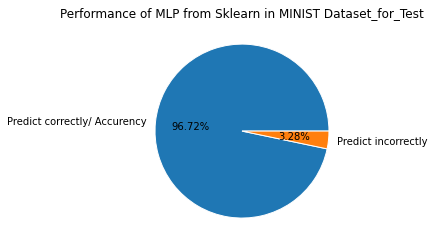

In [17]:
result = np.array([np.sum(test_labels==predicted_labels),np.sum(test_labels!=predicted_labels) ])
plt.pie(result,
        labels=['Predict correctly/ Accurency','Predict incorrectly'],
#         explode=(0.1, 0),
        autopct='%.2f%%',
        wedgeprops={"linewidth": 1, "edgecolor": "white"})
plt.title("Performance of MLP from Sklearn in MINIST Dataset_for_Test")
plt.show()

In [18]:
# An example of showing the probability that the handwritten numbers in this picture belong to each of these ten categories

predict_proba_test_image=clf.predict_proba(test_im)
predict_proba_test_image[0]

array([6.24268833e-068, 5.79710610e-081, 3.65543098e-059, 1.04019681e-045,
       7.24937684e-076, 7.77443943e-080, 2.61657464e-111, 1.00000000e+000,
       6.43844095e-079, 3.77477637e-057])

In [19]:
print('Test accuracy: {:.2%}'.format(test_correct/len(test_labels)))

Test accuracy: 96.72%


#### 2.2.3 Use [Pytorch] method to construct MLP model

[Pytorch]:https://pytorch.org/

In [ ]:
PyTorch is an optimized tensor library for deep learning using GPUs and CPUs, well known for its  numerous applications interface and rich network layers. In January 2017, FAIR (Facebook AI Research) released PyTorch, a deep learning framework rebuilt in python on top of Torch.

Although the volume and complexity of this task does not require the use of a GPU for accelerated computation, Pytorch has a number of integrated interface applications with **a wealth of network layers** to call upon, such as fully connected layers, convolutional layers, pooling layers, and a number of very **useful activation functions, loss functions, etc.**, which are very reusable. We therefore chose to use Pytorch to build the MLP model manually.


The process of building and training a neural network model for a specific task type using Pytorch is illustrated below.
[![](https://mermaid.ink/img/pako:eNptks1qwzAMx19F-NTCtgfoYdAmGxTSUbaOHewcNFtpzBI72A6l-3j32e4-SlsdgiP9JP0l-4NJq4jNWNPZnWzRBagehfHj69bh0MJq-bB82kDRofe60RKDtgaevTZbWFVrYZR2JLMz5UG0v9yTpMFZSd4foGTnqcnmcH19Cwtektdbk5rAKkrs6n9kkZGCF9b44EYZwA5B9_qdHKBR0Fnvj_Ai4yXfONQmCS_2sqMjoMzA3YTnRrAhH-rpIUxGnUw15yUG9BRyq3TuLCpy9aXBNot_77qc8LWjAR2BOpSop7nzZ_oFR77FIer7hLLiZ4XPlRxNJE8muqxAm2EMqeM9F6yxbodOTbJzKlidAkUVl9oPI0GVdhg9VUTTPm9eUb7lhF_25Zm_kN62AcYhDkDZCfdHauMHhGFXrCfXo1bxmX2ksGChpZ4Em8WjogbHLggmzFdED7XulA7WsVmDnacrhmOwT3sj2SxeN_1Cpca4iP6H-voGeOXlEQ)](https://mermaid-js.github.io/mermaid-live-editor/edit#pako:eNptks1qwzAMx19F-NTCtgfoYdAmGxTSUbaOHewcNFtpzBI72A6l-3j32e4-SlsdgiP9JP0l-4NJq4jNWNPZnWzRBagehfHj69bh0MJq-bB82kDRofe60RKDtgaevTZbWFVrYZR2JLMz5UG0v9yTpMFZSd4foGTnqcnmcH19Cwtektdbk5rAKkrs6n9kkZGCF9b44EYZwA5B9_qdHKBR0Fnvj_Ai4yXfONQmCS_2sqMjoMzA3YTnRrAhH-rpIUxGnUw15yUG9BRyq3TuLCpy9aXBNot_77qc8LWjAR2BOpSop7nzZ_oFR77FIer7hLLiZ4XPlRxNJE8muqxAm2EMqeM9F6yxbodOTbJzKlidAkUVl9oPI0GVdhg9VUTTPm9eUb7lhF_25Zm_kN62AcYhDkDZCfdHauMHhGFXrCfXo1bxmX2ksGChpZ4Em8WjogbHLggmzFdED7XulA7WsVmDnacrhmOwT3sj2SxeN_1Cpca4iP6H-voGeOXlEQ)

In [41]:
import torch 
import numpy
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [ ]:
train_im, test_im =input_reshape(train_images, test_images)
train_im = np.array(train_im)
test_im = np.array(test_im)
train_im.shape

In [ ]:
# Perpare dataset

# Call reshape function defined in section 2.2.2

class MINIST(Dataset):
  def __init__(self, data, label):
      self.len = data.shape[0]  # shape(多少行，多少列)
      self.data = torch.from_numpy(data)
      self.label = torch.from_numpy(label)

  def __getitem__(self, index):
      return self.data[index], self.label[index]

  def __len__(self):
      return self.len
train_dataset = MINIST(train_im, train_labels)
test_dataset = MINIST(test_im, test_labels)
train_loader = DataLoader(dataset=train_dataset,batch_size=64,shuffle=True)
test_loader = DataLoader(dataset=test_dataset,batch_size=64,shuffle=True)

In [86]:
# Design model

class MLP(torch.nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.fc1 = torch.nn.Linear(784,100)
    self.fc2 = torch.nn.Linear(100,10)

  def forward(self,input):
    input = torch.nn.functional.relu(self.fc1(input))
    input = self.fc2(input)
    return input

In [87]:
# Consturcr loss and optimizer

model = MLP()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5)

In [88]:
def train(epoc):
    train_loss = 0.0
    for batch_index, data in enumerate(train_loader):
        x, target = data
        y_pred = model(x)
        loss = criterion(y_pred, target)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch_index % 500 == 499:
#             print('[%d, %5d] loss:%.3f' % (epoc + 1, batch_index + 1, train_loss / 500))
            train_loss = 0.0
    return loss.item()

In [89]:
def test(epoc):
    with torch.no_grad():
        correct = 0
        total = 0
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, pred = torch.max(outputs.data, dim=1)
            total += labels.size(0)
            correct += (pred == labels).sum().item()
        print("Epoc: {}, Test acc: {:.3f}".format(epoc+1,100 * correct / total))
        return correct / total

In [90]:
# Training cycle: forward, backward and update

if __name__ == '__main__':
  loss_list = []
  test_acu = []
  epoch = range(200)
  for epoc in epoch:
      loss_list.append(train(epoc))
      if epoc % 10 == 9:
#         print('epoc: ', epoc+1)
        test_acu.append(test(epoc))

Epoc: 9, Test acc: 96.040
Epoc: 19, Test acc: 96.370
Epoc: 29, Test acc: 96.480
Epoc: 39, Test acc: 96.640
Epoc: 49, Test acc: 96.620
Epoc: 59, Test acc: 96.790
Epoc: 69, Test acc: 96.730
Epoc: 79, Test acc: 96.750
Epoc: 89, Test acc: 96.810
Epoc: 99, Test acc: 96.820
Epoc: 109, Test acc: 96.850
Epoc: 119, Test acc: 96.820
Epoc: 129, Test acc: 96.840
Epoc: 139, Test acc: 96.880
Epoc: 149, Test acc: 96.890
Epoc: 159, Test acc: 96.860
Epoc: 169, Test acc: 96.880
Epoc: 179, Test acc: 96.880
Epoc: 189, Test acc: 96.850
Epoc: 199, Test acc: 96.870


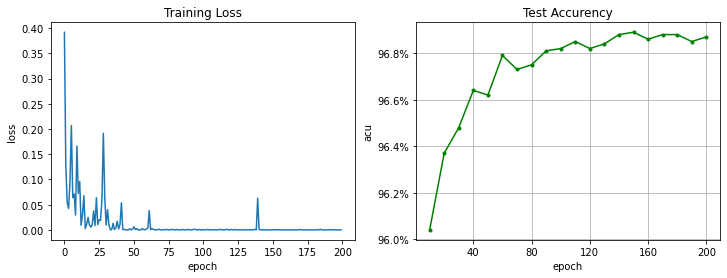

In [91]:
# Display results
import matplotlib.ticker as ticker
from matplotlib.pyplot import MultipleLocator
x_major_locator=MultipleLocator(40)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12, 4))
ax = axes.ravel()
ax[0].plot(epoch, loss_list)
ax[0].set_title('Training Loss')
ax[0].set_ylabel('loss')
ax[0].set_xlabel('epoch')

i = range(10,210,10)
ax[1].plot(i,test_acu, 'g', marker='.')
ax[1].set_title('Test Accurency')
ax[1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
ax[1].set_ylabel('acu')
ax[1].set_xlabel('epoch')
ax[1].xaxis.set_major_locator(x_major_locator)
plt.grid(True)
plt.show()

#### 2.2.4 Conclusion
    

**Test Accurency**

|Sklearn MLP class | Pytorch construct MLP manually |
| --- | --- | 
|  96.72% |  96.87%| 
